In [1]:
import pandas as pd
import numpy as np

In [2]:
## 'r' -> to read
f = open('Rashika - Miners B.txt','r', encoding = 'utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

03/10/21, 21:40 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
03/10/21, 20:56 - Samir Cu created group "Miners Team B"
03/10/21, 21:40 - You joined using this group's invite link
03/10/21, 21:42 - Avinash Cu joined using this group's invite link
03/10/21, 21:43 - Abhay Cu joined using this group's invite link
03/10/21, 21:49 - +91 90595 30210 joined using this group's invite link
03/10/21, 21:52 - Samir Cu: Guys msg your name asap
03/10/21, 21:53 - Rashika: Rashika Dabas
03/10/21, 21:53 - Mayank Cu: Mayank Kumar Gola
03/10/21, 21:53 - Abhay Cu: Abhay Gadaiya
03/10/21, 21:54 - +91 90595 30210: This message was deleted
03/10/21, 21:54 - Samir Cu: Why you are here?
03/10/21, 21:55 - +91 90595 30210: This message was deleted
03/10/21, 21:56 - Samir Cu: Yes
03/10/21, 21:56 - +91 90595 30210 left
03/10/21, 21:57 - Samir Cu: Guys ask other to join
03/10/21, 21:57 - Sunny Cu joined using this group'

In [5]:
# Refer regex101 for using regular expression
import re

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
# To have data splitted according to dates from text
# [1:] to remove first empty element
message = re.split(pattern, data)[1:]
len(message)

824

In [8]:
print(message)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Samir Cu created group "Miners Team B"\n', "You joined using this group's invite link\n", "Avinash Cu joined using this group's invite link\n", "Abhay Cu joined using this group's invite link\n", "+91 90595 30210 joined using this group's invite link\n", 'Samir Cu: Guys msg your name asap\n', 'Rashika: Rashika Dabas\n', 'Mayank Cu: Mayank Kumar Gola\n', 'Abhay Cu: Abhay Gadaiya\n', '+91 90595 30210: This message was deleted\n', 'Samir Cu: Why you are here?\n', '+91 90595 30210: This message was deleted\n', 'Samir Cu: Yes\n', '+91 90595 30210 left\n', 'Samir Cu: Guys ask other to join\n', "Sunny Cu joined using this group's invite link\n", "Samir Cu: 🔴🔴 short Meet today at 11pm.\n\nMandatory for all.\n\nHope it's ok for you\n", 'Mayank Cu: Ok\n', 'Rashika: 👍🏻\n', "Rahul Cu joined using this group's invite link\n", "Samir Cu: 🔴🔴 short Meet tod

In [9]:
# To filter dates from text
dates = re.findall(pattern, data)
len(dates)

824

In [10]:
print(dates)

['03/10/21, 21:40 - ', '03/10/21, 20:56 - ', '03/10/21, 21:40 - ', '03/10/21, 21:42 - ', '03/10/21, 21:43 - ', '03/10/21, 21:49 - ', '03/10/21, 21:52 - ', '03/10/21, 21:53 - ', '03/10/21, 21:53 - ', '03/10/21, 21:53 - ', '03/10/21, 21:54 - ', '03/10/21, 21:54 - ', '03/10/21, 21:55 - ', '03/10/21, 21:56 - ', '03/10/21, 21:56 - ', '03/10/21, 21:57 - ', '03/10/21, 21:57 - ', '03/10/21, 21:58 - ', '03/10/21, 21:58 - ', '03/10/21, 21:59 - ', '03/10/21, 21:59 - ', '03/10/21, 22:00 - ', '03/10/21, 22:00 - ', '03/10/21, 22:00 - ', '03/10/21, 22:02 - ', '03/10/21, 22:07 - ', '03/10/21, 22:08 - ', '03/10/21, 22:09 - ', '03/10/21, 22:15 - ', '03/10/21, 22:16 - ', '03/10/21, 22:29 - ', '03/10/21, 22:31 - ', '03/10/21, 22:31 - ', '03/10/21, 22:32 - ', '03/10/21, 22:32 - ', '03/10/21, 22:33 - ', '03/10/21, 22:33 - ', '03/10/21, 22:33 - ', '03/10/21, 22:33 - ', '03/10/21, 22:33 - ', '03/10/21, 22:33 - ', '03/10/21, 22:34 - ', '03/10/21, 22:35 - ', '03/10/21, 22:57 - ', '03/10/21, 22:58 - ', '03/10/21

In [11]:
df = pd.DataFrame({'user_message':message,'date':dates})
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%y, %H:%M - ')
df.head(10)

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-10-03 21:40:00
1,"Samir Cu created group ""Miners Team B""\n",2021-10-03 20:56:00
2,You joined using this group's invite link\n,2021-10-03 21:40:00
3,Avinash Cu joined using this group's invite li...,2021-10-03 21:42:00
4,Abhay Cu joined using this group's invite link\n,2021-10-03 21:43:00
5,+91 90595 30210 joined using this group's invi...,2021-10-03 21:49:00
6,Samir Cu: Guys msg your name asap\n,2021-10-03 21:52:00
7,Rashika: Rashika Dabas\n,2021-10-03 21:53:00
8,Mayank Cu: Mayank Kumar Gola\n,2021-10-03 21:53:00
9,Abhay Cu: Abhay Gadaiya\n,2021-10-03 21:53:00


In [12]:
user = []
messages = []
for chat in df['user_message']:
    if ':' in chat:
        entry = re.split('([\w\W]+?):\s',chat)
        user.append(entry[1])
        messages.append(entry[2])
    else:
        user.append('group notification')
        messages.append(chat)
df['user_message'] = messages
df['user'] = user

In [13]:
df

,user_message,date,user
0,Messages and calls are end-to-end encrypted. N...,2021-10-03 21:40:00,group notification
1,"Samir Cu created group ""Miners Team B""\n",2021-10-03 20:56:00,group notification
2,You joined using this group's invite link\n,2021-10-03 21:40:00,group notification
3,Avinash Cu joined using this group's invite li...,2021-10-03 21:42:00,group notification
4,Abhay Cu joined using this group's invite link\n,2021-10-03 21:43:00,group notification
...,...,...,...
819,10.30\nAnd mujhe ke baar jaga dena 10.30 ko ki...,2022-04-24 21:23:00,Samir Cu
820,Ok\n,2022-04-24 21:24:00,Mayank Cu
821,Meet will going to start in 5 min\n,2022-04-24 22:24:00,Mayank Cu
822,sameer aa raha hie 5 min me\n,2022-04-24 22:25:00,Mayank Cu


In [14]:
df['year'] = df['date'].dt.year

In [15]:
df['month'] = df['date'].dt.month_name()

In [16]:
df['day'] = df['date'].dt.day

In [17]:
df['hour'] = df['date'].dt.hour

In [18]:
df['minute'] = df['date'].dt.minute

In [19]:
df

,user_message,date,user,year,month,day,hour,minute
0,Messages and calls are end-to-end encrypted. N...,2021-10-03 21:40:00,group notification,2021,October,3,21,40
1,"Samir Cu created group ""Miners Team B""\n",2021-10-03 20:56:00,group notification,2021,October,3,20,56
2,You joined using this group's invite link\n,2021-10-03 21:40:00,group notification,2021,October,3,21,40
3,Avinash Cu joined using this group's invite li...,2021-10-03 21:42:00,group notification,2021,October,3,21,42
4,Abhay Cu joined using this group's invite link\n,2021-10-03 21:43:00,group notification,2021,October,3,21,43
...,...,...,...,...,...,...,...,...
819,10.30\nAnd mujhe ke baar jaga dena 10.30 ko ki...,2022-04-24 21:23:00,Samir Cu,2022,April,24,21,23
820,Ok\n,2022-04-24 21:24:00,Mayank Cu,2022,April,24,21,24
821,Meet will going to start in 5 min\n,2022-04-24 22:24:00,Mayank Cu,2022,April,24,22,24
822,sameer aa raha hie 5 min me\n,2022-04-24 22:25:00,Mayank Cu,2022,April,24,22,25


In [20]:
df.shape

(824, 8)

In [21]:
df[df['user'] == 'Mayank Cu'].shape[0]

179

In [22]:
# message.split() will give a list
# append will exactly copy the given list but extend will copy the elements of list
# extend and append are same when we do not pass a collection
words = []
for message in df['user_message']:
    words.extend(message.split())

In [23]:
len(words)

3133

In [24]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Samir',
 'Cu',
 'created',
 'group',
 '"Miners',
 'Team',
 'B"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Avinash',
 'Cu',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Abhay',
 'Cu',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '90595',
 '30210',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Guys',
 'msg',
 'your',
 'name',
 'asap',
 'Rashika',
 'Dabas',
 'Mayank',
 'Kumar',
 'Gola',
 'Abhay',
 'Gadaiya',
 'This',
 'message',
 'was',
 'deleted',
 'Why',
 'you',
 'are',
 'here?',
 'This',
 'message',
 'was',
 'deleted',
 'Yes',
 '+91',
 '90595',
 '30210',
 'left',
 'Guys',
 'ask',
 'other',
 'to',
 'join',
 'Sunny',
 'Cu',
 'joined',
 'using',
 'this',
 "gr

In [25]:
df[df['user_message'] == "<Media omitted>\n"].shape[0]

73

# !pip install urlextract

In [26]:
from urlextract import URLExtract
extractor = URLExtract()

In [27]:
links =[]
for message in df['user_message']:
    links.extend(extractor.find_urls(message))
len(links)

29

In [28]:
x = df['user'].value_counts().head()

In [29]:
import matplotlib.pyplot as plt

In [30]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Samir Cu'),
  Text(1, 0, 'Mayank Cu'),
  Text(2, 0, 'Abhay Cu'),
  Text(3, 0, 'Avinash Cu'),
  Text(4, 0, 'Ishika')])

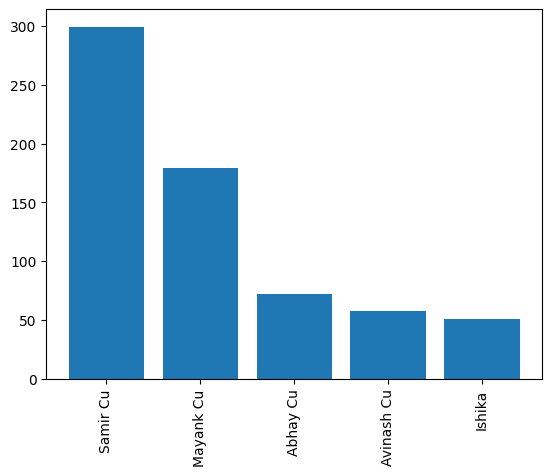

In [31]:
plt.bar(name, count)
plt.xticks(rotation = 'vertical')

In [32]:
round((df['user'].value_counts()/df.shape[0]) * 100,2).reset_index().rename(columns = {'index':'name','user':'percentage'})

,percentage,count
0,Samir Cu,36.29
1,Mayank Cu,21.72
2,Abhay Cu,8.74
3,Avinash Cu,7.04
4,Ishika,6.19
5,Rahul Cu,5.58
6,Sunny Cu,4.61
7,Naman Cu,3.16
8,Rashika,2.55
9,Rehman Cu,2.43


In [33]:
df['user'].value_counts()

user
Samir Cu              299
Mayank Cu             179
Abhay Cu               72
Avinash Cu             58
Ishika                 51
Rahul Cu               46
Sunny Cu               38
Naman Cu               26
Rashika                21
Rehman Cu              20
group notification     12
+91 90595 30210         2
Name: count, dtype: int64

In [34]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Samir',
 'Cu',
 'created',
 'group',
 '"Miners',
 'Team',
 'B"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Avinash',
 'Cu',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Abhay',
 'Cu',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '90595',
 '30210',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Guys',
 'msg',
 'your',
 'name',
 'asap',
 'Rashika',
 'Dabas',
 'Mayank',
 'Kumar',
 'Gola',
 'Abhay',
 'Gadaiya',
 'This',
 'message',
 'was',
 'deleted',
 'Why',
 'you',
 'are',
 'here?',
 'This',
 'message',
 'was',
 'deleted',
 'Yes',
 '+91',
 '90595',
 '30210',
 'left',
 'Guys',
 'ask',
 'other',
 'to',
 'join',
 'Sunny',
 'Cu',
 'joined',
 'using',
 'this',
 "gr

In [35]:
len(words)

3133

In [36]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,Ok,80
1,hai,74
2,<Media,73
3,omitted>,73
4,to,37
5,@917506941616,29
6,Okay,26
7,me,25
8,Yes,23
9,hie,23


In [37]:
df.shape

(824, 8)

In [38]:
df1= df[df['user']!='group notification']

In [39]:
df2=df1[df1['user_message']!= '<Media omitted>\n']

In [40]:
temp = df2[df2['user_message'] != 'This message was deleted\n']

In [41]:
temp

,user_message,date,user,year,month,day,hour,minute
6,Guys msg your name asap\n,2021-10-03 21:52:00,Samir Cu,2021,October,3,21,52
7,Rashika Dabas\n,2021-10-03 21:53:00,Rashika,2021,October,3,21,53
8,Mayank Kumar Gola\n,2021-10-03 21:53:00,Mayank Cu,2021,October,3,21,53
9,Abhay Gadaiya\n,2021-10-03 21:53:00,Abhay Cu,2021,October,3,21,53
11,Why you are here?\n,2021-10-03 21:54:00,Samir Cu,2021,October,3,21,54
...,...,...,...,...,...,...,...,...
819,10.30\nAnd mujhe ke baar jaga dena 10.30 ko ki...,2022-04-24 21:23:00,Samir Cu,2022,April,24,21,23
820,Ok\n,2022-04-24 21:24:00,Mayank Cu,2022,April,24,21,24
821,Meet will going to start in 5 min\n,2022-04-24 22:24:00,Mayank Cu,2022,April,24,22,24
822,sameer aa raha hie 5 min me\n,2022-04-24 22:25:00,Mayank Cu,2022,April,24,22,25


In [42]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
+91
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could


In [43]:
len(stop_words)

6012

In [44]:
words = []
for message in temp['user_message']:
    for word in message.lower().split():
        if word not in stop_words:
            if word == '@917506941616':
                words.append('admin tagged')
            else:
                words.append(word)

In [45]:
words

['msg',
 'asap',
 'rashika',
 'dabas',
 'mayank',
 'kumar',
 'gola',
 'abhay',
 'gadaiya',
 'here?',
 'join',
 '🔴🔴',
 'short',
 'meet',
 'today',
 '11pm.',
 'mandatory',
 'all.',
 '👍🏻',
 '🔴🔴',
 'short',
 'meet',
 'today',
 '11pm.',
 'mandatory',
 'all.',
 '👍',
 'ishika',
 'gupta',
 'sunny',
 'mehrotra',
 'rahul',
 'giri',
 'avinash',
 'sahu',
 '🔴🔴',
 'short',
 'meet',
 'today',
 '11pm.',
 'mandatory',
 'all.',
 'msg',
 'asap',
 'joine',
 'in🙌',
 'rahul',
 'giri',
 'avinash',
 'sahu',
 'ishika',
 'gupta',
 'join',
 'tumne',
 '😅',
 'okie🥲',
 'naman',
 'kaur',
 'https://meet.google.com/wqr-jpja-tgg',
 'meet',
 'link',
 'camera',
 'ohk',
 'admin tagged',
 'share',
 'cu',
 'ppt',
 'temple',
 'here!',
 'samir',
 'shared',
 'session',
 'baje',
 '3:20',
 'pm',
 '3:30',
 'session',
 'member',
 'toady',
 '10.30',
 'pm',
 'you?',
 '👍',
 'admin tagged',
 'mine',
 'confirm',
 'delhi',
 'reached',
 'attend',
 'meeting',
 'today',
 '10.30',
 'pm',
 'okk',
 'share',
 'meet',
 'link',
 '10.30',
 'ok🙌',

In [46]:
len(words)

1207

In [47]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,admin tagged,29
1,hie,23
2,session,19
3,meet,17
4,okie,14
5,raat,13
6,👍,12
7,baje,12
8,10,12
9,join,10


# !pip install emoji

In [48]:
import emoji

In [49]:
## emoji's code -> emoji's unicode in english language -> number for machine and symbol for human
emojis = []
for i in df['user_message']:
    emojis.extend([c for c in i if c in emoji.EMOJI_DATA])

In [50]:
emojis

['🔴',
 '🔴',
 '👍',
 '🏻',
 '🔴',
 '🔴',
 '👍',
 '🔴',
 '🔴',
 '🙌',
 '😅',
 '🥲',
 '👍',
 '🙌',
 '🥺',
 '🥺',
 '🥺',
 '🥺',
 '👍',
 '🏻',
 '😅',
 '👍',
 '🏻',
 '✌',
 '🏻',
 '🌝',
 '💚',
 '👍',
 '🙌',
 '👍',
 '👍',
 '😇',
 '😈',
 '😏',
 '🤝',
 '😅',
 '🤣',
 '😂',
 '😂',
 '😂',
 '😂',
 '😃',
 '😂',
 '🥲',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '👍',
 '🏻',
 '👍',
 '👍',
 '👍',
 '✌',
 '🏻',
 '👍',
 '🙌',
 '😅',
 '😅',
 '🥺',
 '😒',
 '😒',
 '😂',
 '😂',
 '😂',
 '😂',
 '🙂',
 '😈',
 '😈',
 '😈',
 '😅',
 '😆',
 '😂',
 '😎',
 '👍',
 '😁',
 '👍',
 '🏻',
 '😌',
 '😊',
 '🥺',
 '🥺',
 '😍',
 '😍',
 '😍',
 '😍',
 '😍',
 '😍',
 '😍',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😅',
 '😎',
 '👍',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😅',
 '🥲',
 '🙂',
 '👍',
 '🌝',
 '😂',
 '🤣',
 '🤣',
 '🤣',
 '🙂',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '😂',
 '🤣',
 '🥲',
 '🥲',
 '😊',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '🤩',
 '😒',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '👍',
 '👍',
 '😂',
 '👍',
 '👍',
 '🏻',
 '👍',
 '😅',
 '😅',
 '🥲',
 '😬',
 '😂',
 '😂',
 '🤣']

In [51]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,25
1,👍,22
2,🤣,20
3,😅,10
4,🏻,9
5,🤩,9
6,🥺,7
7,😍,7
8,🔴,6
9,🥲,6


In [52]:
df

,user_message,date,user,year,month,day,hour,minute
0,Messages and calls are end-to-end encrypted. N...,2021-10-03 21:40:00,group notification,2021,October,3,21,40
1,"Samir Cu created group ""Miners Team B""\n",2021-10-03 20:56:00,group notification,2021,October,3,20,56
2,You joined using this group's invite link\n,2021-10-03 21:40:00,group notification,2021,October,3,21,40
3,Avinash Cu joined using this group's invite li...,2021-10-03 21:42:00,group notification,2021,October,3,21,42
4,Abhay Cu joined using this group's invite link\n,2021-10-03 21:43:00,group notification,2021,October,3,21,43
...,...,...,...,...,...,...,...,...
819,10.30\nAnd mujhe ke baar jaga dena 10.30 ko ki...,2022-04-24 21:23:00,Samir Cu,2022,April,24,21,23
820,Ok\n,2022-04-24 21:24:00,Mayank Cu,2022,April,24,21,24
821,Meet will going to start in 5 min\n,2022-04-24 22:24:00,Mayank Cu,2022,April,24,22,24
822,sameer aa raha hie 5 min me\n,2022-04-24 22:25:00,Mayank Cu,2022,April,24,22,25


In [53]:
df['month_num'] = df['date'].dt.month

In [54]:
df

,user_message,date,user,year,month,day,hour,minute,month_num
0,Messages and calls are end-to-end encrypted. N...,2021-10-03 21:40:00,group notification,2021,October,3,21,40,10
1,"Samir Cu created group ""Miners Team B""\n",2021-10-03 20:56:00,group notification,2021,October,3,20,56,10
2,You joined using this group's invite link\n,2021-10-03 21:40:00,group notification,2021,October,3,21,40,10
3,Avinash Cu joined using this group's invite li...,2021-10-03 21:42:00,group notification,2021,October,3,21,42,10
4,Abhay Cu joined using this group's invite link\n,2021-10-03 21:43:00,group notification,2021,October,3,21,43,10
...,...,...,...,...,...,...,...,...,...
819,10.30\nAnd mujhe ke baar jaga dena 10.30 ko ki...,2022-04-24 21:23:00,Samir Cu,2022,April,24,21,23,4
820,Ok\n,2022-04-24 21:24:00,Mayank Cu,2022,April,24,21,24,4
821,Meet will going to start in 5 min\n,2022-04-24 22:24:00,Mayank Cu,2022,April,24,22,24,4
822,sameer aa raha hie 5 min me\n,2022-04-24 22:25:00,Mayank Cu,2022,April,24,22,25,4


In [55]:
timeline = df.groupby(['year','month','month_num']).count()['user_message'].reset_index()

In [56]:
timeline

,year,month,month_num,user_message
0,2021,December,12,16
1,2021,November,11,95
2,2021,October,10,345
3,2022,April,4,212
4,2022,February,2,135
5,2022,March,3,21


In [57]:
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + " - " + str(timeline['year'][i]))

In [58]:
time

['December - 2021',
 'November - 2021',
 'October - 2021',
 'April - 2022',
 'February - 2022',
 'March - 2022']

In [59]:
timeline['time'] = time

In [60]:
timeline

,year,month,month_num,user_message,time
0,2021,December,12,16,December - 2021
1,2021,November,11,95,November - 2021
2,2021,October,10,345,October - 2021
3,2022,April,4,212,April - 2022
4,2022,February,2,135,February - 2022
5,2022,March,3,21,March - 2022


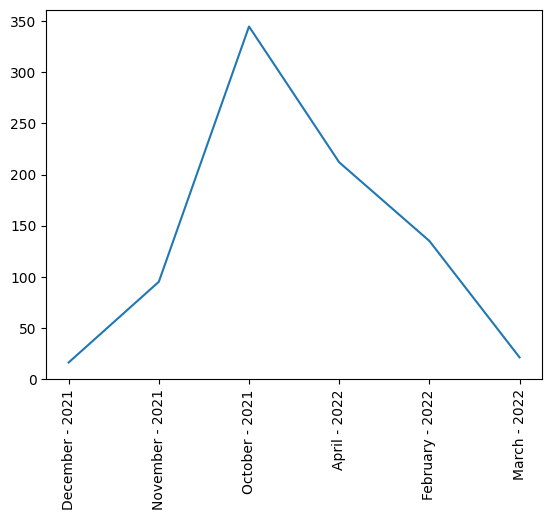

In [61]:
plt.plot(timeline['time'], timeline['user_message'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df['only_date'] = df['date'].dt.date

In [63]:
df

,user_message,date,user,year,month,day,hour,minute,month_num,only_date
0,Messages and calls are end-to-end encrypted. N...,2021-10-03 21:40:00,group notification,2021,October,3,21,40,10,2021-10-03
1,"Samir Cu created group ""Miners Team B""\n",2021-10-03 20:56:00,group notification,2021,October,3,20,56,10,2021-10-03
2,You joined using this group's invite link\n,2021-10-03 21:40:00,group notification,2021,October,3,21,40,10,2021-10-03
3,Avinash Cu joined using this group's invite li...,2021-10-03 21:42:00,group notification,2021,October,3,21,42,10,2021-10-03
4,Abhay Cu joined using this group's invite link\n,2021-10-03 21:43:00,group notification,2021,October,3,21,43,10,2021-10-03
...,...,...,...,...,...,...,...,...,...,...
819,10.30\nAnd mujhe ke baar jaga dena 10.30 ko ki...,2022-04-24 21:23:00,Samir Cu,2022,April,24,21,23,4,2022-04-24
820,Ok\n,2022-04-24 21:24:00,Mayank Cu,2022,April,24,21,24,4,2022-04-24
821,Meet will going to start in 5 min\n,2022-04-24 22:24:00,Mayank Cu,2022,April,24,22,24,4,2022-04-24
822,sameer aa raha hie 5 min me\n,2022-04-24 22:25:00,Mayank Cu,2022,April,24,22,25,4,2022-04-24


In [64]:
timeline_date = df.groupby('only_date').count()['user_message'].reset_index()

In [65]:
timeline_date

,only_date,user_message
0,2021-10-03,48
1,2021-10-04,17
2,2021-10-05,15
3,2021-10-06,1
4,2021-10-07,43
5,2021-10-08,18
6,2021-10-09,1
7,2021-10-10,13
8,2021-10-14,15
9,2021-10-15,7
